In [2]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image
import seaborn as sns
sns.set_style()
%matplotlib inline


In [3]:
print(tf.__version__)

2.12.0


In [5]:
!unzip -q '/content/drive/MyDrive/test_w_labels.zip'

In [ ]:
!unzip -q '/content/drive/MyDrive/train_w_labels.zip'

In [ ]:
!unzip -q '/content/drive/MyDrive/val_w_labels.zip'

In [ ]:
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
train_dataset = image_dataset_from_directory(
    '/content/train_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 91166 files belonging to 15 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    '/content/val_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [6]:
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
test_dataset = image_dataset_from_directory(
    '/content/test_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=False,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [7]:
normalization_layer = layers.Rescaling(1./255)
train_ds_norm = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [8]:
# Setting up model
img_width, img_height = 70, 70


nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 2000
batch_size = 128
n_classes = 15
input_shape= (img_width, img_height, 1)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/keras/final_model.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [ ]:
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/2000
713/713 [==============================] - 26s 31ms/step - loss: 1.7793 - accuracy: 0.4446 - val_loss: 1.2023 - val_accuracy: 0.5936
Epoch 2/2000
713/713 [==============================] - 21s 30ms/step - loss: 1.2049 - accuracy: 0.6103 - val_loss: 1.1787 - val_accuracy: 0.5992
Epoch 3/2000
713/713 [==============================] - 21s 29ms/step - loss: 1.0660 - accuracy: 0.6569 - val_loss: 1.1009 - val_accuracy: 0.6276
Epoch 4/2000
713/713 [==============================] - 21s 30ms/step - loss: 0.9829 - accuracy: 0.6833 - val_loss: 1.0349 - val_accuracy: 0.6588
Epoch 5/2000
713/713 [==============================] - 21s 29ms/step - loss: 0.9216 - accuracy: 0.7030 - val_loss: 0.9800 - val_accuracy: 0.6841
Epoch 6/2000
713/713 [==============================] - 21s 29ms/step - loss: 0.8830 - accuracy: 0.7161 - val_loss: 0.7638 - val_accuracy: 0.7471
Epoch 7/2000
713/713 [==============================] - 20s 28ms/step - loss: 0.8549 - accuracy: 0.7252 - val_loss: 0.9409 -

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.5056 - accuracy: 0.8315 - 1s/epoch - 23ms/step


In [10]:
model.load_weights('keras/final_model.keras')

In [ ]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.4676 - accuracy: 0.8468 - 1s/epoch - 20ms/step


In [ ]:
model.save('final_model.keras')

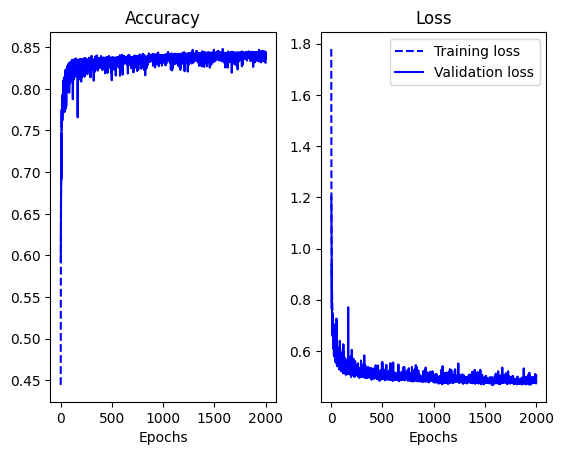

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
ax1.plot(epochs, accuracy, 'b--', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax2.plot(epochs, loss, 'b--', label='Training loss')
ax2.plot(epochs, val_loss, 'b',label='Validation loss')
ax1.set_title('Accuracy')
ax2.set_title('Loss')
ax1.set_xlabel('Epochs')

ax2.set_xlabel('Epochs')

plt.legend()
plt.show()

In [ ]:
model.load_weights('final_model.keras')

In [11]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 16s - loss: 0.4676 - accuracy: 0.8468 - 16s/epoch - 265ms/step


In [12]:
test_dataset = test_ds_norm.map(lambda x, y: (255*x, y))

In [13]:
y_true = []
x_test = []
for x, y in test_dataset:
    y = y.numpy()
    y_true.append(y)
    x_test.append(x)

In [14]:
y_true = [item for sublist in y_true for item in sublist]

In [15]:
len(y_true)

7500

In [16]:
y_true[0]

0

In [17]:
x_test = [item for sublist in x_test for item in sublist]

In [18]:
len(x_test)

7500

In [19]:
y_pred = model.predict(
    test_ds_norm,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

59/59 [==============================] - 15s 228ms/step


In [20]:
y_pred = y_pred.argmax(axis=1)

In [21]:
y_pred.shape

(7500,)

In [22]:
label_dict = {0:'blouse', 1:'dhoti_pants', 2:'dupattas', 3:'gowns', 4:'kurta_men', 5:'leggings_and_salwars', 6:'lehenga',
          7:'mojaris_men', 8:'mojaris_women', 9:'nehru_jackets', 10:'palazzos', 11:'petticoats', 12:'sherwanis', 13:'saree',
           14:'women_kurta'}

In [23]:
def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = np.squeeze(tensor, axis=2)
    return Image.fromarray(tensor)

In [24]:
x_test[0].shape

TensorShape([70, 70, 1])

True label: blouse. Predicted label: blouse


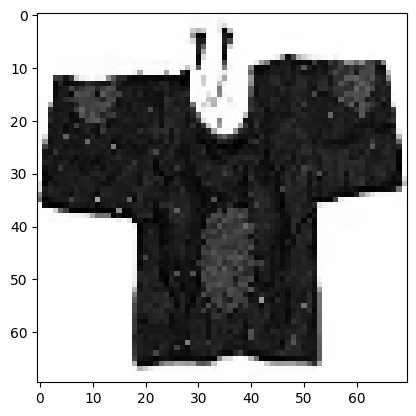

In [25]:
img = tensor_to_image(x_test[1])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1]]}. Predicted label: {label_dict[y_pred[1]]}')


True label: sherwanis. Predicted label: sherwanis


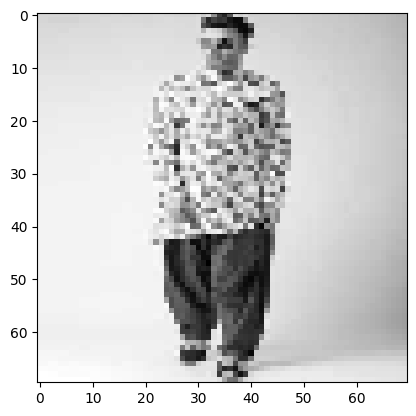

In [26]:
img = tensor_to_image(x_test[6500])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6500]]}. Predicted label: {label_dict[y_pred[6500]]}')

True label: dupattas. Predicted label: women_kurta


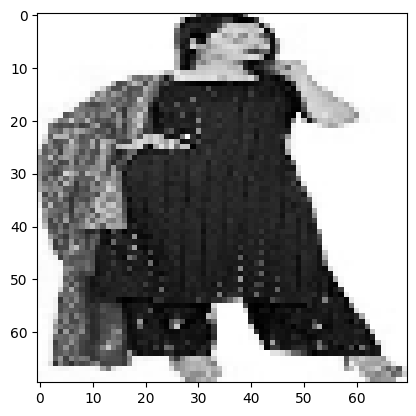

In [27]:
img = tensor_to_image(x_test[1120])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1120]]}. Predicted label: {label_dict[y_pred[1120]]}')

True label: dupattas. Predicted label: dupattas


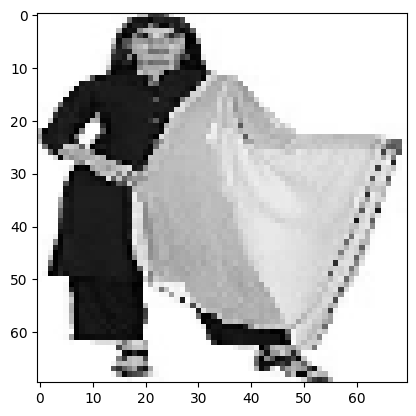

In [28]:
img = tensor_to_image(x_test[1300])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1300]]}. Predicted label: {label_dict[y_pred[1300]]}')

True label: women_kurta. Predicted label: women_kurta


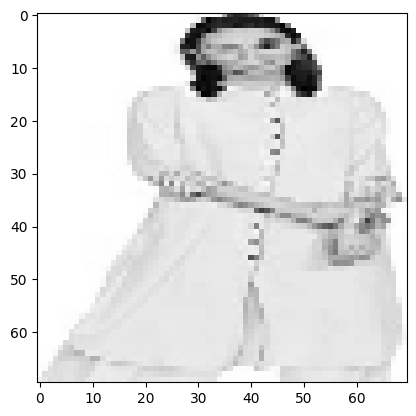

In [29]:
img = tensor_to_image(x_test[7000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[7000]]}. Predicted label: {label_dict[y_pred[7000]]}')


True label: saree. Predicted label: saree


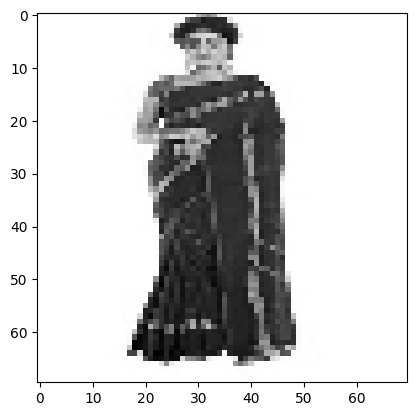

In [30]:
img = tensor_to_image(x_test[6000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6000]]}. Predicted label: {label_dict[y_pred[6000]]}')

In [31]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[478,   0,   6,   0,   1,   0,   0,   0,   4,   1,   1,   3,   0,
          5,   1],
       [  4, 311,   9,   2,  11,  68,   1,   2,   1,   1,  10,   9,   3,
          5,  63],
       [  2,   0, 343,   9,   0,  21,  10,   0,   2,   0,   0,   3,   1,
         20,  89],
       [  1,   2,  18, 285,   2,   1,  14,   0,   0,   1,   2,   3,   0,
         16, 155],
       [  0,   4,   1,   0, 469,   0,   1,   0,   0,   7,   0,   0,  13,
          1,   4],
       [  0,  14,   8,   1,   0, 440,   0,   0,   1,   0,  30,   3,   0,
          1,   2],
       [  1,   0,   2,  19,   0,   0, 473,   0,   0,   0,   1,   1,   0,
          1,   2],
       [  1,   1,   3,   1,   0,   0,   2, 412,  76,   0,   0,   0,   0,
          4,   0],
       [  2,   0,   3,   0,   1,   2,   0,  46, 442,   0,   1,   0,   0,
          3,   0],
       [  1,   0,   3,   0,  15,   0,   0,   0,   0, 471,   2,   1,   5,
          2,   0],
       [  0,   2,   2,   1,   0,  54,   9,   0,   0,   0, 424,   4,   0,
       

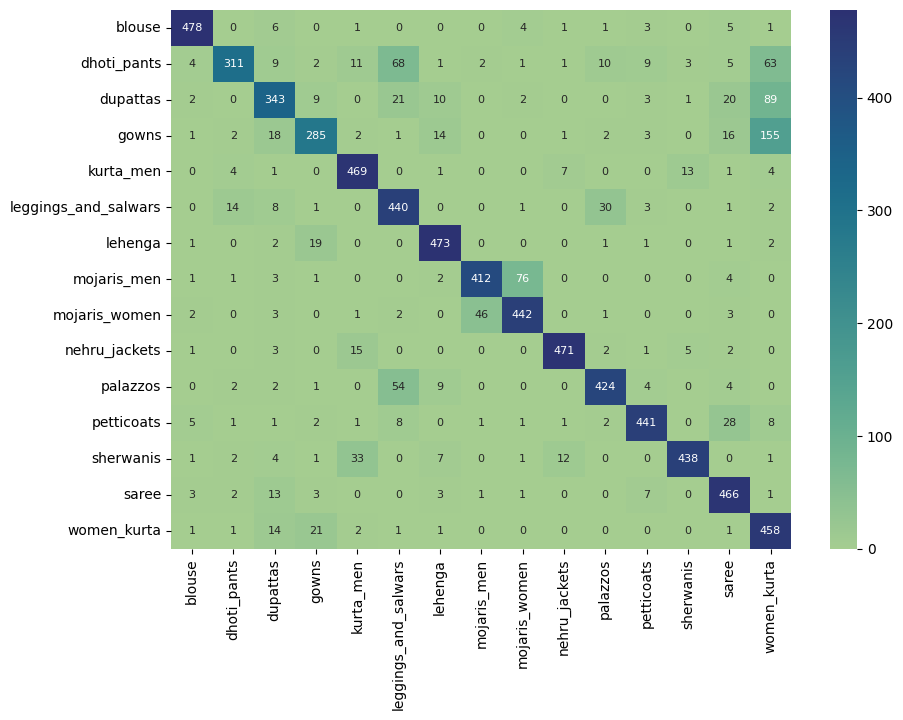

In [32]:
df_cm = pd.DataFrame(cm, index = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'],
                  columns = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'])
plt.figure(figsize = (10,7))
_ = sns.heatmap(df_cm, annot=True, annot_kws={"size":8}, fmt='d', cmap='crest')